# UP 206A Midterm Part 1: Nathan Keibler

## Research Question

Our research aims to find out if there is a correlation between the median income of a neighborhood and its number of permitted ADUs. Our hypothesis is that the permitting of ADUs will be negatively associated with neighborhood income because neighborhoods with more wealth will be more inclined to resist affordable housing options and maintain their exclusivity.

## Data Sources

We are using two primary types of data sources to tackle this research question. The first type is permit data. This allows us to determine the date and location of each permit pulled to pursue accessory dwelling unit developments. See the first link below for permit data from 2013 to present day for the city of Los Angeles. The second type of data source we are using is American Community Survey income data. The second link below shows income at the census tract level throughout the City of Los Angeles.

- https://bit.ly/2YOtS7j
- https://bit.ly/36KXiaV

## Permit Data Exploration: Exporting Dataset from the LADBS Website

For this midterm assignment, I'd like to pick up where I left off last week with exploring the ADU permit data. This dataset is quite robust. It provides information about *all* permit applications filed with the Los Angeles Department of Building and Safety (LADBS) since early 2013. In total, the source offers 1,246,999 rows, each containing information about a separate permit. Since Bryan and I first looked at this dataset, we assumed that we would extract the relevant permits by filtering out any that did not have the following combinations of words under the "Work Description" column: Accessory Dwelling Unit(s), Accessory Dwelling, or ADU(s). Filtering the data in this way could potentially result in us missing some ADU permits, as over 680,000 entries in the set leave "Work Description" blank.

However, after taking a closer look at the dataset last week, I found a column that is potentially more useful for us, "# of Accessory Dwelling Units." After I filter the dataset to only display permit applications that have 1 or 2 listed for the aforementioned column, the number of rows clocks in at just over 14,400. I selected 1 or 2 because I know that state legislation allows for up to 2 ADUs on one residentially zoned lot. 14,400 permits seems much more in line with my expectations (after having previously read reports stating that ADU permits filed in the city exceeded 12,000). 

Unfortunately, not all 14,400 of these permits provide information in the Latitude/Longitude column. When I filter the set to include only those entries that provide geospatial data, it shrinks to 8,668. This makes me sad, but if there is no geospatial data provided for the permit, it is useless to our research. 

To summarize, I will proceed with exporting this dataset from LADBS using the following filters: 

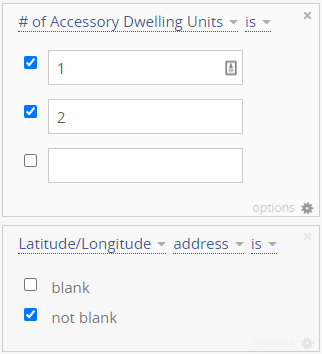

## Permit Data Exploration: Excel Cleaning

Before I upload this dataset to my notebook, some portions of it need to be cleaned in Excel. I will do the following before uploading: 

- Splitting Latitude/Longitude column into two separate columns and removing parantheses. This is necessary for the geopandas library to interpret these datapoints as spatial.
- Splitting the "Issue Date" column from its current format (MM/DD/YYYY) into three separate columns: "MM," "DD," and "YYYY." I am doing this because I would potentially like to sort my permit points into separate colors based on year in future analyses using maps. When I tried to do this previously, I was having a hard time extracting "YYYY" from each observation in Python. 

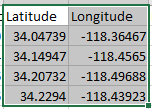 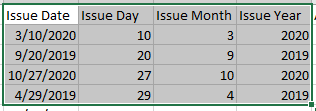

## Permit Data Exploration: Uploading Data & Loading Libraries

Now that I've cleaned the dataset in excel, I will upload it to my notebook. I will also load the relevant libraries. I'm hoping to make an interactive map this week (first try!), so I will upload the plotly.express library.

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
df = gpd.read_file('data - NK/Building_and_Safety_Permit_Information_Old_cleaned.csv')

## Inspecting Data

I'll do a couple quick data checks to see what my dataframe looks like.

In [3]:
df.shape

(8668, 63)

Great! This lets me know that there are 8668 rows and 63 columns. This makes me feel good because I remember when I was downloading the dataset from LADBS, it notified me that there were 8668 rows. 

In [4]:
df.head()

Assessor Book Assessor Page Assessor Parcel                    Tract Block  \
0          5069             2              15                  TR 4713         
1          2276            18              28                  TR 5822         
2          2226            14               6                 TR 20444         
3          2637             1              20                 TR 14616         
4          5053            24              32  CHA'S VICTOR HALL TRACT    26   

   Lot Reference # (Old Permit #)      PCIS Permit #          Status  \
0   43                  20WL05816  19014-10000-05185          Issued   
1  316                  19VN04144  19016-20001-12927  Permit Finaled   
2    6                  20ON 1930  20016-10000-19416          Issued   
3   87                  19VN92737  19016-20000-10523     CofO Issued   
4   21                  20ON 1938  20010-10000-02259          Issued   

  Status Date  ...         Zone Occupancy  \
0   3/10/2020  ...    R1R3-RG-O             
1  10/28/2020  ...       RE11-1             
2  10/27/2020  ...         R1-1             
3  10/31/2020  ...         R1-1             
4  10/27/2020  ...  R1R3-O-CPIO             

  Floor Area-L.A. Building Code Definition Census Tract Council District  \
0                                      115         2169               10   
1                                        0      1413.04                4   
2                                        0      1321.02                6   
3                                        0         1199                6   
4                                      438         2221                8   

   Latitude   Longitude Existing Code Proposed Code geometry  
0  34.04739  -118.36467             7             1     None  
1  34.14947   -118.4565             1             1     None  
2  34.20732  -118.49688             1             1     None  
3   34.2294  -118.43923             1             1     None  
4  34.02655  -118.30291                           1     None  

[5 rows x 63 columns]

Also feeling good about this one. Latitude and Longitude both have their own columns. I'd like to see all the columns, though, to confirm that the "Issue Year" column I created in Excel shows up.

In [5]:
pd.set_option('display.max_columns', None)
df.head()

Assessor Book Assessor Page Assessor Parcel                    Tract Block  \
0          5069             2              15                  TR 4713         
1          2276            18              28                  TR 5822         
2          2226            14               6                 TR 20444         
3          2637             1              20                 TR 14616         
4          5053            24              32  CHA'S VICTOR HALL TRACT    26   

   Lot Reference # (Old Permit #)      PCIS Permit #          Status  \
0   43                  20WL05816  19014-10000-05185          Issued   
1  316                  19VN04144  19016-20001-12927  Permit Finaled   
2    6                  20ON 1930  20016-10000-19416          Issued   
3   87                  19VN92737  19016-20000-10523     CofO Issued   
4   21                  20ON 1938  20010-10000-02259          Issued   

  Status Date        Permit Type         Permit Sub-Type Permit Category  \
0   3/10/2020      Bldg-Addition  1 or 2 Family Dwelling      Plan Check   
1  10/28/2020  Bldg-Alter/Repair  1 or 2 Family Dwelling      Plan Check   
2  10/27/2020  Bldg-Alter/Repair  1 or 2 Family Dwelling      Plan Check   
3  10/31/2020  Bldg-Alter/Repair  1 or 2 Family Dwelling      Plan Check   
4  10/27/2020           Bldg-New  1 or 2 Family Dwelling      Plan Check   

  Project Number Event Code Initiating Office  Issue Date Issue Day  \
0                                       METRO   3/10/2020        10   
1                                    VAN NUYS   9/20/2019        20   
2                                       METRO  10/27/2020        27   
3                                    VAN NUYS   4/29/2019        29   
4                                       METRO  10/27/2020        27   

  Issue Month Issue Year Address Start Address Fraction Start Address End  \
0           3       2020          1563                               1563   
1           9       2019         14826                              14826   
2          10       2020          7527                               7529   
3           4       2019          8764                               8766   
4          10       2020          3023                               3023   

  Address Fraction End Street Direction Street Name Street Suffix  \
0                                     S     GENESEE           AVE   
1                2-Jan                W   GREENLEAF            ST   
2                                     N     RUFFNER           AVE   
3                                     N    RANCHITO           AVE   
4                                     S    HALLDALE           AVE   

  Suffix Direction Unit Range Start Unit Range End Zip Code  \
0                                                     90019   
1                                                     91403   
2                                                     91406   
3                                                     91402   
4                                                     90018   

                                    Work Description  Valuation  \
0  CONVERTING OF (E) GARAGE INTO ACCESSORY DWELLI...  50,000.00   
1  Supplemental permit of 19016-20000-12927 to ch...        501   
2  CONVERSION OF (E) ATTACHED GARAGE TO ACCESSORY...  50,000.00   
3  CONVERT THE (E) ATTACHED GARAGE INTO A (N) ADU...  20,000.00   
4  NEW DETACHED ACCESSORY DWELLING UNIT PER STATE...  44,238.00   

  Floor Area-L.A. Zoning Code Definition # of Residential Dwelling Units  \
0                                    386                               0   
1                                      0                               0   
2                                    360                               0   
3                                  388.5                                   
4                                    438                                   

  # of Accessory Dwelling Units # of Stories  \
0                             1        

Nice! The "Issue Year" column is showing up.

## Converting dataframe to geodataframe and plotting

I first experimented with this in last week's individual assignment. I'll do the same process again. 

In [6]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

Great! Now I'll try plotting it. 

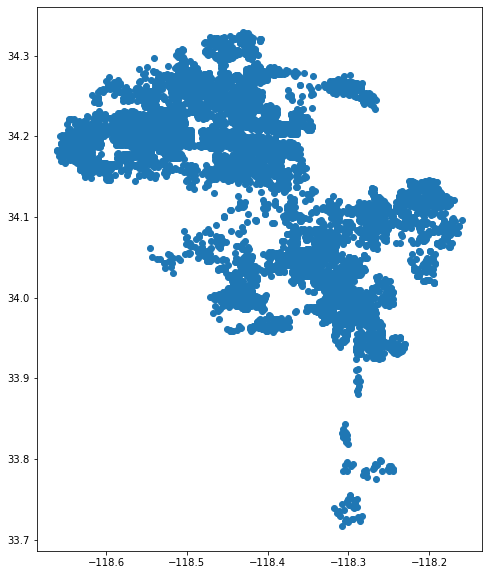

In [7]:
gdf.plot(figsize=(10,10))

Ok looking good! These dots create a shape with an outline that matches that of the City of Los Angeles. Now I'll define the geodataframe as CRS so Python knows this is spatial. Then I will convert this to Web Mercator so contextily can place the data properly. 

In [8]:
gdf.set_crs(epsg=4326, inplace=True)

Assessor Book Assessor Page Assessor Parcel                    Tract  \
0             5069             2              15                  TR 4713   
1             2276            18              28                  TR 5822   
2             2226            14               6                 TR 20444   
3             2637             1              20                 TR 14616   
4             5053            24              32  CHA'S VICTOR HALL TRACT   
...            ...           ...             ...                      ...   
8663          6031            31              11            SUNSET SQUARE   
8664          2346            20               2                 TR 11715   
8665          2167            11               6                  TR 6170   
8666          2336            36              35                  TR 5847   
8667          2131            25               2                 TR 24037   

     Block   Lot Reference # (Old Permit #)      PCIS Permit #  \
0             43                  20WL05816  19014-10000-05185   
1            316                  19VN04144  19016-20001-12927   
2              6                  20ON 1930  20016-10000-19416   
3             87                  19VN92737  19016-20000-10523   
4       26    21                  20ON 1938  20010-10000-02259   
...    ...   ...                        ...                ...   
8663          20                  19SL68122  19010-10000-00417   
8664           2                  19VN01880  19016-20000-04281   
8665     O  2608                  19VN92782  18010-20000-04034   
8666     A    48                  20VN19507  20014-20000-01584   
8667           2                  19VN87586  19014-20000-00557   

              Status Status Date        Permit Type         Permit Sub-Type  \
0             Issued   3/10/2020      Bldg-Addition  1 or 2 Family Dwelling   
1     Permit Finaled  10/28/2020  Bldg-Alter/Repair  1 or 2 Family Dwelling   
2             Issued  10/27/2020  Bldg-Alter/Repair  1 or 2 Family Dwelling   
3        CofO Issued  10/31/2020  Bldg-Alter/Repair  1 or 2 Family Dwelling   
4             Issued  10/27/2020           Bldg-New  1 or 2 Family Dwelling   
...              ...         ...                ...                     ...   
8663          Issued  10/21/2019           Bldg-New  1 or 2 Family Dwelling   
8664          Issued   8/22/2019  Bldg-Alter/Repair  1 or 2 Family Dwelling   
8665     CofO Issued  11/23/2020           Bldg-New  1 or 2 Family Dwelling   
8666          Issued  10/28/2020      Bldg-Addition  1 or 2 Family Dwelling   
8667     CofO Issued   11/7/2019  Bldg-Alter/Repair  1 or 2 Family Dwelling   

     Permit Category Project Number Event Code Initiating Office  Issue Date  \
0         Plan Check                                       METRO   3/10/2020   
1         Plan Check                                    VAN NUYS   9/20/2019   
2         Plan Check                                       METRO  10/27/2020   
3         Plan Check                                    VAN NUYS   4/29/2019   
4         Plan Check                                       METRO  10/27/2020   
...              ...            ...        ...               ...         ...   
8663      Plan Check                                       METRO  10/21/2019   
8664      Plan Check                                    VAN NUYS   8/22/2019   
8665      Plan Check                                    VAN NUYS   4/30/2019   
8666      Plan Check                                    VAN NUYS  10/28/2020   
8667      Plan Check                                    VAN NUYS   2/20/2019   

     Issue Day Issue Month Issue Year Address Start Address Fraction Start  \
0           10           3       2020          1563                          
1           20           9       2019         14826                          
2           27          10       2020          7527                          
3           29           4       2019          8764              

In [9]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

Now I will plot the geodataframe onto a basemap.

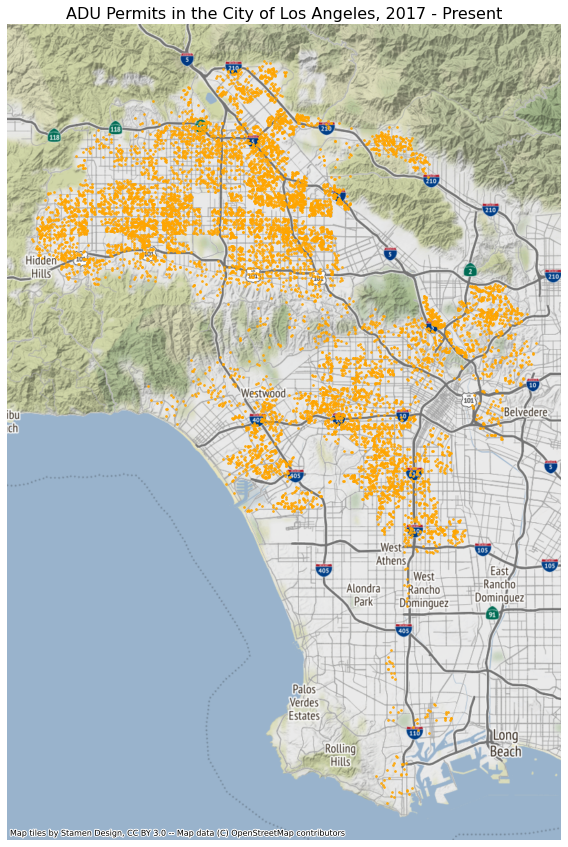

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator.plot(ax=ax, alpha=0.8, markersize=3, color='orange')

ax.axis('off')

ax.set_title('ADU Permits in the City of Los Angeles, 2017 - Present',fontsize=16)

ctx.add_basemap(ax)

Yay! Looking good. 

## Creating bar charts with plotly

Now I'll use the new library I uploaded, "plotly.express," to create some bar charts with the permit dataset. First, I will attempt to create one that shows "Issue Year" on the x-axis and "Number of Permits Issued" on the y-axis. I'm glad I cleaned the excel spreadsheet before uploading so that year has its own column. This will make my bar chart more legible.

In [11]:
px.bar(df,
       x='Issue Year',
       title='ADU Permits Issued in the City of Los Angeles by Year',
       labels={'Issue Year':'Issue Year','count':'Number of Permits Issued'}
      )

Sweet. It looks like 2019 was a big year for ADU permits. A couple takeaways below: 

- It's interesting that the dataset includes no information on permits filed before 2017. This makes sense, I suppose, considering all the new state legislation that made ADU development easier took effect in early 2017. Since the LADBS website told me that the permit data went as far back as 2013, I find it hard to believe that *zero* ADU permits were filed between 2013 and 2017, but maybe these permits were not captured because they did not input any latitudinal or longitudinal information. 
- It's also interesting to note the significant decrease in number of permits filed in 2020 compared to 2019. My guess is that Covid caused homeowners to rethink their financial plans. I'm also thinking that the shift to working virtually caused the development process to slow down quite a bit. My understanding is that drawing sets delivered to the city for review have to sit for two weeks before a city employee will look them over. But, I also thought that ADU permit applications were allowed to use the city's e-file process... I'll have to look more into this.

Now I'd like to create some stacked bar charts that specifically considering the following columns in our permit dataset: 
 
- Status: The status of a permit can range from "approved" to "issued" to "certificate of occupancy issued." The latter is largely considered to be one of the final steps in the construction process. This document certifies that the property that has recently been constructed or converted complies with all building codes while also being fit for occupancy by a business or individual.
- Initiating Office: LADBS has five different offices throughout the city: Metro, Van Nuys, West LA, South LA, and San Pedro. I'm curious to see if a certain office is handling more ADU permits than others.
- Zip Code

In [12]:
# show me distinct value of charges
# outputting list of unique values in a column
df.Status.unique().tolist()

['Issued',
 'Permit Finaled',
 'CofO Issued',
 'CofO in Progress',
 'Re-Activate Permit',
 'Refund Completed',
 'CofO Corrected',
 'Permit Expired',
 'Permit Closed',
 'Permit Withdrawn',
 'Refund in Progress',
 'Approved']

In [13]:
# show me distinct value of permits
# value count returns series, reset_index converts series to dataframe, which we are more comfortable with
permit_by_status = df.Status.value_counts().reset_index()
permit_by_status.columns=['Permit Status','Count']
permit_by_status

Permit Status  Count
0          CofO Issued   4571
1               Issued   3296
2     CofO in Progress    476
3       Permit Finaled    210
4       CofO Corrected     40
5   Re-Activate Permit     26
6     Refund Completed     26
7       Permit Expired     11
8        Permit Closed      5
9   Refund in Progress      3
10    Permit Withdrawn      3
11            Approved      1

In [14]:
# show me how many of each permit status type
# returning every single column and how many records are not null
df.groupby(['Status']).count()

Assessor Book  Assessor Page  Assessor Parcel  Tract  \
Status                                                                     
Approved                        1              1                1      1   
CofO Corrected                 40             40               40     40   
CofO Issued                  4571           4571             4571   4571   
CofO in Progress              476            476              476    476   
Issued                       3296           3296             3296   3296   
Permit Closed                   5              5                5      5   
Permit Expired                 11             11               11     11   
Permit Finaled                210            210              210    210   
Permit Withdrawn                3              3                3      3   
Re-Activate Permit             26             26               26     26   
Refund Completed               26             26               26     26   
Refund in Progress              3              3                3      3   

                    Block   Lot  Reference # (Old Permit #)  PCIS Permit #  \
Status                                                                       
Approved                1     1                           1              1   
CofO Corrected         40    40                          40             40   
CofO Issued          4571  4571                        4571           4571   
CofO in Progress      476   476                         476            476   
Issued               3296  3296                        3296           3296   
Permit Closed           5     5                           5              5   
Permit Expired         11    11                          11             11   
Permit Finaled        210   210                         210            210   
Permit Withdrawn        3     3                           3              3   
Re-Activate Permit     26    26                          26             26   
Refund Completed       26    26                          26             26   
Refund in Progress      3     3                           3              3   

                    Status Date  Permit Type  Permit Sub-Type  \
Status                                                          
Approved                      1            1                1   
CofO Corrected               40           40               40   
CofO Issued                4571         4571             4571   
CofO in Progress            476          476              476   
Issued                     3296         3296             3296   
Permit Closed                 5            5                5   
Permit Expired               11           11               11   
Permit Finaled              210          210              210   
Permit Withdrawn              3            3                3   
Re-Activate Permit           26           26               26   
Refund Completed             26           26               26   
Refund in Progress            3            3                3   

                    Permit Category  Project Number  Event Code  \
Status                                                            
Approved                          1               1           1   
CofO Corrected                   40              40          40   
CofO Issued                    4571            4571        4571   
CofO in Progress                476             476         476   
Issued                         3296            3296        3296   
Permit Closed                     5               5           5   
Permit Expired                   11              11          11   
Permit Finaled                  210             210         210   
Permit Withdrawn                  3               3           3   
Re-Activate Permit               26              26          26   
Refund Completed                 26              26          26   
Refund in Progress                3               3           3   

            

In [15]:
# ok, group by issue year and status, and let's get a count for each
df_grouped=df.groupby(['Issue Year','Status']).count()[['Assessor Book']]
df_grouped.head(50)

Assessor Book
Issue Year Status                           
2017       CofO Corrected                  9
           CofO Issued                   803
           CofO in Progress               29
           Issued                        177
           Permit Closed                   1
           Permit Expired                  6
           Permit Finaled                 43
           Re-Activate Permit              5
           Refund Completed                6
2018       CofO Corrected                 15
           CofO Issued                  1761
           CofO in Progress              109
           Issued                        585
           Permit Closed                   1
           Permit Expired                  4
           Permit Finaled                 62
           Permit Withdrawn                1
           Re-Activate Permit             13
           Refund Completed               13
2019       CofO Corrected                 12
           CofO Issued                  1592
           CofO in Progress              218
           Issued                       1005
           Permit Closed                   3
           Permit Expired                  1
           Permit Finaled                 70
           Permit Withdrawn                1
           Re-Activate Permit              8
           Refund Completed                7
2020       Approved                        1
           CofO Corrected                  4
           CofO Issued                   415
           CofO in Progress              119
           Issued                       1404
           Permit Finaled                 34
           Permit Withdrawn                1
           Refund in Progress              3
2021       CofO in Progress                1
           Issued                        125
           Permit Finaled                  1

In [16]:
# flatten the multi-index, multi-level dataframe
df_flat = df_grouped.reset_index()
df_flat

Issue Year              Status  Assessor Book
0        2017      CofO Corrected              9
1        2017         CofO Issued            803
2        2017    CofO in Progress             29
3        2017              Issued            177
4        2017       Permit Closed              1
5        2017      Permit Expired              6
6        2017      Permit Finaled             43
7        2017  Re-Activate Permit              5
8        2017    Refund Completed              6
9        2018      CofO Corrected             15
10       2018         CofO Issued           1761
11       2018    CofO in Progress            109
12       2018              Issued            585
13       2018       Permit Closed              1
14       2018      Permit Expired              4
15       2018      Permit Finaled             62
16       2018    Permit Withdrawn              1
17       2018  Re-Activate Permit             13
18       2018    Refund Completed             13
19       2019      CofO Corrected             12
20       2019         CofO Issued           1592
21       2019    CofO in Progress            218
22       2019              Issued           1005
23       2019       Permit Closed              3
24       2019      Permit Expired              1
25       2019      Permit Finaled             70
26       2019    Permit Withdrawn              1
27       2019  Re-Activate Permit              8
28       2019    Refund Completed              7
29       2020            Approved              1
30       2020      CofO Corrected              4
31       2020         CofO Issued            415
32       2020    CofO in Progress            119
33       2020              Issued           1404
34       2020      Permit Finaled             34
35       2020    Permit Withdrawn              1
36       2020  Refund in Progress              3
37       2021    CofO in Progress              1
38       2021              Issued            125
39       2021      Permit Finaled              1

In [17]:
# rename the rpt_id column to count
df_flat = df_flat.rename(columns={'Assessor Book':'Count'})

In [18]:
px.bar(df_flat,
       x='Issue Year',
       y='Count',
       title='ADU Permits Issued in the City of Los Angeles by Permit Status and Year',
       labels={'Count':'Number of Permits Issued'},
       color='Status' # this creates the "stack"
      )

In [19]:
df.columns = ['Assessor Book', 'Assessor Page', 'Assessor Parcel', 'Tract', 'Block',
       'Lot', 'Reference # (Old Permit #)', 'PCIS Permit #', 'Status',
       'Status Date', 'Permit Type', 'Permit Sub-Type', 'Permit Category',
       'Project Number', 'Event Code', 'initiating_office', 'Issue Date',
       'Issue Day', 'Issue Month', 'Issue Year', 'Address Start',
       'Address Fraction Start', 'Address End', 'Address Fraction End',
       'Street Direction', 'Street Name', 'Street Suffix', 'Suffix Direction',
       'Unit Range Start', 'Unit Range End', 'Zip_Code', 'Work Description',
       'Valuation', 'Floor Area-L.A. Zoning Code Definition',
       '# of Residential Dwelling Units', '# of Accessory Dwelling Units',
       '# of Stories', 'Contractors_Business_Name', 'Contractor Address',
       'Contractor City', 'Contractor State', 'License Type', 'License #',
       'Principal First Name', 'Principal Middle Name', 'Principal Last Name',
       'License Expiration Date', 'Applicant First Name',
       'Applicant Last Name', 'Applicant Business Name', 'Applicant Address 1',
       'Applicant Address 2', 'Applicant Address 3', 'Zone', 'Occupancy',
       'Floor Area-L.A. Building Code Definition', 'Census Tract',
       'Council District', 'Latitude', 'Longitude', 'Existing Code',
       'Proposed Code', 'geometry']

In [20]:
px.bar(df,
       x='initiating_office',
       title='ADU Permits Issued in the City of Los Angeles by Initiating Office',
       labels={'initiating_office':'Initiating Office','count':'Number of Permits Issued'}
      )

In [21]:
# show me distinct value of charges
# outputting list of unique values in a column
df.initiating_office.unique().tolist()

['METRO', 'VAN NUYS', 'SOUTH LA', 'WEST LA', 'SANPEDRO']

In [22]:
# show me distinct value of charges
# value count returns series, reset_index converts series to dataframe, which we are more comfortable with
permit_by_office = df.initiating_office.value_counts().reset_index()
permit_by_office.columns=['Office','Count']
permit_by_office

Office  Count
0  VAN NUYS   5679
1     METRO   1870
2   WEST LA    691
3  SOUTH LA    362
4  SANPEDRO     66

In [23]:
df.groupby(['initiating_office']).count()

Assessor Book  Assessor Page  Assessor Parcel  Tract  \
initiating_office                                                         
METRO                       1870           1870             1870   1870   
SANPEDRO                      66             66               66     66   
SOUTH LA                     362            362              362    362   
VAN NUYS                    5679           5679             5679   5679   
WEST LA                      691            691              691    691   

                   Block   Lot  Reference # (Old Permit #)  PCIS Permit #  \
initiating_office                                                           
METRO               1870  1870                        1870           1870   
SANPEDRO              66    66                          66             66   
SOUTH LA             362   362                         362            362   
VAN NUYS            5679  5679                        5679           5679   
WEST LA              691   691                         691            691   

                   Status  Status Date  Permit Type  Permit Sub-Type  \
initiating_office                                                      
METRO                1870         1870         1870             1870   
SANPEDRO               66           66           66               66   
SOUTH LA              362          362          362              362   
VAN NUYS             5679         5679         5679             5679   
WEST LA               691          691          691              691   

                   Permit Category  Project Number  Event Code  Issue Date  \
initiating_office                                                            
METRO                         1870            1870        1870        1870   
SANPEDRO                        66              66          66          66   
SOUTH LA                       362             362         362         362   
VAN NUYS                      5679            5679        5679        5679   
WEST LA                        691             691         691         691   

                   Issue Day  Issue Month  Issue Year  Address Start  \
initiating_office                                                      
METRO                   1870         1870        1870           1870   
SANPEDRO                  66           66          66             66   
SOUTH LA                 362          362         362            362   
VAN NUYS                5679         5679        5679           5679   
WEST LA                  691          691         691            691   

                   Address Fraction Start  Address End  Address Fraction End  \
initiating_office                                                              
METRO                                1870         1870                  1870   
SANPEDRO                               66           66                    66   
SOUTH LA                              362          362                   362   
VAN NUYS                             5679         5679                  5679   
WEST LA                               691          691                   691   

                   Street Direction  Street Name  Street Suffix  \
initiating_office                                                 
METRO                          1870         1870           1870   
SANPEDRO                         66           66             66   
SOUTH LA                        362          362            362   
VAN NUYS                       5679         5679           5679   
WEST LA                         691          691            691   

                   Suffix Direction  Unit Range Start  Unit Range End  \
initiating_office                                                       
METRO                          1870              1870            1870   
SANPEDRO                         66                66              66   
SOUTH LA                        362               362             362   


In [24]:
# ok, group by issue year and status, and let's get a count for each
df_grouped_2=df.groupby(['Issue Year','initiating_office']).count()[['Assessor Book']]
df_grouped_2.head(50)

Assessor Book
Issue Year initiating_office               
2017       METRO                        232
           SANPEDRO                       6
           SOUTH LA                      44
           VAN NUYS                     689
           WEST LA                      108
2018       METRO                        520
           SANPEDRO                      20
           SOUTH LA                     143
           VAN NUYS                    1661
           WEST LA                      220
2019       METRO                        533
           SANPEDRO                      27
           SOUTH LA                     121
           VAN NUYS                    2025
           WEST LA                      211
2020       METRO                        531
           SANPEDRO                      13
           SOUTH LA                      53
           VAN NUYS                    1239
           WEST LA                      145
2021       METRO                         54
           SOUTH LA                       1
           VAN NUYS                      65
           WEST LA                        7

In [25]:
# flatten the multi-index, multi-level dataframe
df_flat_2 = df_grouped_2.reset_index()
df_flat_2

Issue Year initiating_office  Assessor Book
0        2017             METRO            232
1        2017          SANPEDRO              6
2        2017          SOUTH LA             44
3        2017          VAN NUYS            689
4        2017           WEST LA            108
5        2018             METRO            520
6        2018          SANPEDRO             20
7        2018          SOUTH LA            143
8        2018          VAN NUYS           1661
9        2018           WEST LA            220
10       2019             METRO            533
11       2019          SANPEDRO             27
12       2019          SOUTH LA            121
13       2019          VAN NUYS           2025
14       2019           WEST LA            211
15       2020             METRO            531
16       2020          SANPEDRO             13
17       2020          SOUTH LA             53
18       2020          VAN NUYS           1239
19       2020           WEST LA            145
20       2021             METRO             54
21       2021          SOUTH LA              1
22       2021          VAN NUYS             65
23       2021           WEST LA              7

In [26]:
# rename the rpt_id column to count
df_flat_2 = df_flat_2.rename(columns={'Assessor Book':'Number of Permits Issued'})

In [27]:
px.bar(df_flat_2,
       x='Issue Year',
       y='Number of Permits Issued',
       title='ADU Permits Issued in the City of Los Angeles by Initiating Office and Year',
       color='initiating_office',
       labels={'initiating_office':'Initiating Office'}
      )

In [28]:
px.bar(df,
       x='Zip_Code',
       title='ADU Permits Issued in the City of Los Angeles by Zip Code',
       labels={'count':'Number of Permits Issued'}
      )

In [29]:
# show me distinct value of charges
# outputting list of unique values in a column
df.Zip_Code.unique().tolist()

['90019',
 '91403',
 '91406',
 '91402',
 '90018',
 '90002',
 '90062',
 '90066',
 '91342',
 '90035',
 '91411',
 '91325',
 '90031',
 '90064',
 '91344',
 '90007',
 '91604',
 '90029',
 '91326',
 '90049',
 '91306',
 '91607',
 '90004',
 '91307',
 '90501',
 '90016',
 '90048',
 '90023',
 '90006',
 '91331',
 '90731',
 '91367',
 '90025',
 '90011',
 '90037',
 '90032',
 '90034',
 '91436',
 '91335',
 '90065',
 '91345',
 '91324',
 '90026',
 '90041',
 '90045',
 '90210',
 '91042',
 '91401',
 '90043',
 '91606',
 '91405',
 '90042',
 '91423',
 '90027',
 '90047',
 '91605',
 '90039',
 '90008',
 '91340',
 '91304',
 '91356',
 '90744',
 '90046',
 '90038',
 '90247',
 '90033',
 '91343',
 '90068',
 '91505',
 '90028',
 '91364',
 '90003',
 '90291',
 '90059',
 '91303',
 '90069',
 '90024',
 '90044',
 '90063',
 '91602',
 '90402',
 '91352',
 '90061',
 '90020',
 '91601',
 '90292',
 '90732',
 '90036',
 '91504',
 '90230',
 '90272',
 '91040',
 '91316',
 '91311',
 '90077',
 '90293',
 '90710',
 '90057',
 '90001',
 '90005',


In [30]:
# show me distinct value of charges
# value count returns series, reset_index converts series to dataframe, which we are more comfortable with
permit_by_zip = df.Zip_Code.value_counts().reset_index()
permit_by_zip.columns=['Zip Code','Count']
permit_by_zip

Zip Code  Count
0      91331    457
1      91335    433
2      91342    301
3      91605    294
4      91344    263
..       ...    ...
100    90056      2
101    91214      2
102    90248      1
103    90402      1
104               1

[105 rows x 2 columns]

In [31]:
df.groupby(['Zip_Code']).count()

Assessor Book  Assessor Page  Assessor Parcel  Tract  Block  Lot  \
Zip_Code                                                                     
                      1              1                1      1      1    1   
90001                 8              8                8      8      8    8   
90002                73             73               73     73     73   73   
90003                81             81               81     81     81   81   
90004                87             87               87     87     87   87   
...                 ...            ...              ...    ...    ...  ...   
91602                33             33               33     33     33   33   
91604                59             59               59     59     59   59   
91605               294            294              294    294    294  294   
91606               224            224              224    224    224  224   
91607                89             89               89     89     89   89   

          Reference # (Old Permit #)  PCIS Permit #  Status  Status Date  \
Zip_Code                                                                   
                                   1              1       1            1   
90001                              8              8       8            8   
90002                             73             73      73           73   
90003                             81             81      81           81   
90004                             87             87      87           87   
...                              ...            ...     ...          ...   
91602                             33             33      33           33   
91604                             59             59      59           59   
91605                            294            294     294          294   
91606                            224            224     224          224   
91607                             89             89      89           89   

          Permit Type  Permit Sub-Type  Permit Category  Project Number  \
Zip_Code                                                                  
                    1                1                1               1   
90001               8                8                8               8   
90002              73               73               73              73   
90003              81               81               81              81   
90004              87               87               87              87   
...               ...              ...              ...             ...   
91602              33               33               33              33   
91604              59               59               59              59   
91605             294              294              294             294   
91606             224              224              224             224   
91607              89               89               89              89   

          Event Code  initiating_office  Issue Date  Issue Day  Issue Month  \
Zip_Code                                                                      
                   1                  1           1          1            1   
90001              8                  8           8          8            8   
90002             73                 73          73         73           73   
90003             81                 81          81         81           81   
90004             87                 87          87         87           87   
...              ...                ...         ...        ...          ...   
91602             33                 33          33         33           33   
91604             59                 59          59         59           59   
91605            294                294         294        294          294   
91606            224                224         224        224          224   
91607             89                 89          89         89           89   

  

In [32]:
# ok, group by issue year and status, and let's get a count for each
df_grouped_3=df.groupby(['Issue Year','Zip_Code']).count()[['Assessor Book']]
df_grouped_3.head(50)

Assessor Book
Issue Year Zip_Code               
2017       90001                 2
           90002                 7
           90003                 8
           90004                16
           90005                 1
           90006                 4
           90007                 4
           90008                 3
           90011                 9
           90012                 1
           90016                20
           90018                 5
           90019                25
           90020                 3
           90023                 2
           90024                 4
           90025                 2
           90026                 6
           90027                 4
           90029                 2
           90031                 4
           90032                 6
           90033                 2
           90034                11
           90035                11
           90036                 9
           90037                 7
           90038                 1
           90039                18
           90041                 9
           90042                21
           90043                 6
           90044                12
           90045                 5
           90046                 9
           90047                11
           90048                 6
           90049                 8
           90059                 2
           90062                10
           90063                 1
           90064                13
           90065                17
           90066                34
           90068                 4
           90069                 3
           90077                 1
           90210                 5
           90230                 9
           90247                 1

In [33]:
# flatten the multi-index, multi-level dataframe
df_flat_3 = df_grouped_3.reset_index()
df_flat_3

Issue Year Zip_Code  Assessor Book
0         2017    90001              2
1         2017    90002              7
2         2017    90003              8
3         2017    90004             16
4         2017    90005              1
..         ...      ...            ...
447       2021    91436              1
448       2021    91601              3
449       2021    91605              4
450       2021    91606              1
451       2021    91607              1

[452 rows x 3 columns]

In [34]:
# rename the rpt_id column to count
df_flat_3 = df_flat_3.rename(columns={'Assessor Book':'Number of Permits Issued'})

In [35]:
px.bar(df_flat_3,
       x='Issue Year',
       y='Number of Permits Issued',
       title='ADU Permits Issued in the City of Los Angeles by Zip Code and Year',
       color='Zip_Code',
       labels={'Zip_Code':'Zip Code'}
      )

Great! These stacked barcharts have been a really helpful set of exercises for us to start to analyze the permit dataset. Some of the main takeaways below: 

- In 2020, the number of "Issued" permits was much larger in comparison to the Certificates of Occupancy issued. This deviates from the historical patterns that we see in 2017, 2018, and 2019, where more Certificates of Occupancy are issued in comparison ot "Issued" permits. This is likely due to Covid. It's unfortunate to see that not as many completed ADUs are receiving the necessary documents for residents to occupy them. 
- The Van Nuys permit office has been very busy! It's interesting to see that the majority of ADU permits are being filed with this office. 
- There are a couple zip codes that are filing a much larger number of ADU permits in comparison to others. 91331, 91335, 91342, and 91605 are standouts. 

## Interactive Map

Now I will attempt to create a couple interactive maps. I am very excited for this portion as it will finally give us a chance to zoom in to a finer level of detail on the permit data. First, I'll look at the dataset to see which columns I'd like to focus on.

In [36]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 63 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Assessor Book                             8668 non-null   object  
 1   Assessor Page                             8668 non-null   object  
 2   Assessor Parcel                           8668 non-null   object  
 3   Tract                                     8668 non-null   object  
 4   Block                                     8668 non-null   object  
 5   Lot                                       8668 non-null   object  
 6   Reference # (Old Permit #)                8668 non-null   object  
 7   PCIS Permit #                             8668 non-null   object  
 8   Status                                    8668 non-null   object  
 9   Status Date                               8668 non-null   object  
 10  Permit Type     

Next, I'll create a smaller dataframe "df_mini" and only focus on the following columns: Status, Initiating Office, Issue Year, Zip Code, Work Description, # of Accessory Dwelling Units, Latitude and Longitude.

In [37]:
# subset the data below (don't forget to add .copy at the end)
df_mini = df[['Status','initiating_office','Issue Year','Zip_Code','Work Description','# of Accessory Dwelling Units','Latitude','Longitude']].copy()
df_mini

Status initiating_office Issue Year Zip_Code  \
0             Issued             METRO       2020    90019   
1     Permit Finaled          VAN NUYS       2019    91403   
2             Issued             METRO       2020    91406   
3        CofO Issued          VAN NUYS       2019    91402   
4             Issued             METRO       2020    90018   
...              ...               ...        ...      ...   
8663          Issued             METRO       2019    90003   
8664          Issued          VAN NUYS       2019    91607   
8665     CofO Issued          VAN NUYS       2019    91364   
8666          Issued          VAN NUYS       2020    91606   
8667     CofO Issued          VAN NUYS       2019    91335   

                                       Work Description  \
0     CONVERTING OF (E) GARAGE INTO ACCESSORY DWELLI...   
1     Supplemental permit of 19016-20000-12927 to ch...   
2     CONVERSION OF (E) ATTACHED GARAGE TO ACCESSORY...   
3     CONVERT THE (E) ATTACHED GARAGE INTO A (N) ADU...   
4     NEW DETACHED ACCESSORY DWELLING UNIT PER STATE...   
...                                                 ...   
8663  NEW TWO STORY DEATACHED ADU PER AB 229 AND AB ...   
8664  CONVERT ATTACHED GARAGE TO ACCESSORY DWELLING ...   
8665  NEW 26'-0"X24'-0", MAX HEIGHT 22'-5"  2-STORY ...   
8666  CONVERT (E) 18'-6" X 20'-0" DETACHED GARAGE AN...   
8667  CONVERT (E) 20'-9" X 21'-0" DETACHED GARAGE TO...   

     # of Accessory Dwelling Units  Latitude   Longitude  
0                                1  34.04739  -118.36467  
1                                1  34.14947   -118.4565  
2                                1  34.20732  -118.49688  
3                                1   34.2294  -118.43923  
4                                1  34.02655  -118.30291  
...                            ...       ...         ...  
8663                             1   33.9649  -118.27552  
8664                             1  34.16792  -118.40928  
8665                             1  34.15856  -118.59564  
8666                             1  34.18136  -118.37113  
8667                             1  34.18949  -118.55773  

[8668 rows x 8 columns]

In [38]:
# get info for our subset data
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Status                         8668 non-null   object
 1   initiating_office              8668 non-null   object
 2   Issue Year                     8668 non-null   object
 3   Zip_Code                       8668 non-null   object
 4   Work Description               8668 non-null   object
 5   # of Accessory Dwelling Units  8668 non-null   object
 6   Latitude                       8668 non-null   object
 7   Longitude                      8668 non-null   object
dtypes: object(8)
memory usage: 541.9+ KB


Next, I will convert the latitude and longitude columns to floats.

In [39]:
# convert lat/lon's to floats
df_mini['Latitude'] = df_mini['Latitude'].astype(float)
df_mini['Longitude'] = df_mini['Longitude'].astype(float)
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status                         8668 non-null   object 
 1   initiating_office              8668 non-null   object 
 2   Issue Year                     8668 non-null   object 
 3   Zip_Code                       8668 non-null   object 
 4   Work Description               8668 non-null   object 
 5   # of Accessory Dwelling Units  8668 non-null   object 
 6   Latitude                       8668 non-null   float64
 7   Longitude                      8668 non-null   float64
dtypes: float64(2), object(6)
memory usage: 541.9+ KB


Time to plot! I'll try that below.

In [40]:
px.scatter(df_mini,
           x='Longitude',
           y='Latitude'
          )

In [41]:
fig = px.scatter_mapbox(df_mini,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-terrain")
fig.show()

Great! It's so exciting to be able to zoom in! Now I'll create an interactive map that assigns a different color to each zip code. I'll use a darker basemap so that the colors pop and are more legible.

In [42]:
fig = px.scatter_mapbox(df_mini, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Zip_Code",
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

Sweet! We can now see that 91331, 91335, 91342, and 91605 (standout zip codes we mentioned earlier) are all concentrated in various parts of the San Fernando Valley.